<h1>Instacart Market Basket Analysis:-</h1><br>


# 1.Business problem


<h2>1.1 Description</h2>
<p> Instacart is an online grocery shopping app. Back in 2017 instacart
announced a dataset release, which is anonymized and contains a sample of
over 3 million grocery orders from more than 200,000 Instacart users.</p>
<p> The goal of this competition was basically we need to predict which all
products will be reordered in the next order given user prior purchase
history( set of previous orders, products in that previous orders).</p><br>
> Credits: Kaggle

__ Problem Statement __
- Identify which products will be reordered in the next order. 
- This could provide us with useful business insights.

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/instacart-market-basket-analysis
<br><br>____ Useful Links ____
- Papers 1 :  https://www.kdd.org/kdd2016/papers/files/adf0160-liuA.pdf 
- Papers 2 :  https://kimiyoung.github.io/papers/fang-ijcai-2015.pdf 
- Blog 1 :  https://medium.com/kaggle-blog/instacart-market-basket-analysis-feda2700cded
- Discussion :  https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/38097 
- Discussion :  https://www.kaggle.com/paulantoine/light-gbm-benchmark-0-3692

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

This Dataset comes with 6 different csv files such as<br>
      1.products.csv<br>
      2.orders.csv.zip<br>
      3.order_products__train.csv<br>
      4.order_products__prior.csv<br>
      5.aisles.csv<br> 
      6.departments.csv<br><br>
  **a.** out of thes six csv file products.csv, department.csv, aisles.csv contain the information about products and their departments and aisles.<br>
  **b.** the orders.csv contain the all order details such as whice order id belongs to prior, train, test set and other order details.
  **c.**order_products__prior.csv contain all users order history and order_products__train.csv contain users recent orders.<br>
  **d.**order_products__train.csv given us because using order_products__prior.csv and other given csv files we need predict whice all products will get reordered in order_products__train.csv.<br>
  **e.** from below diagram visualize the releationship between different files.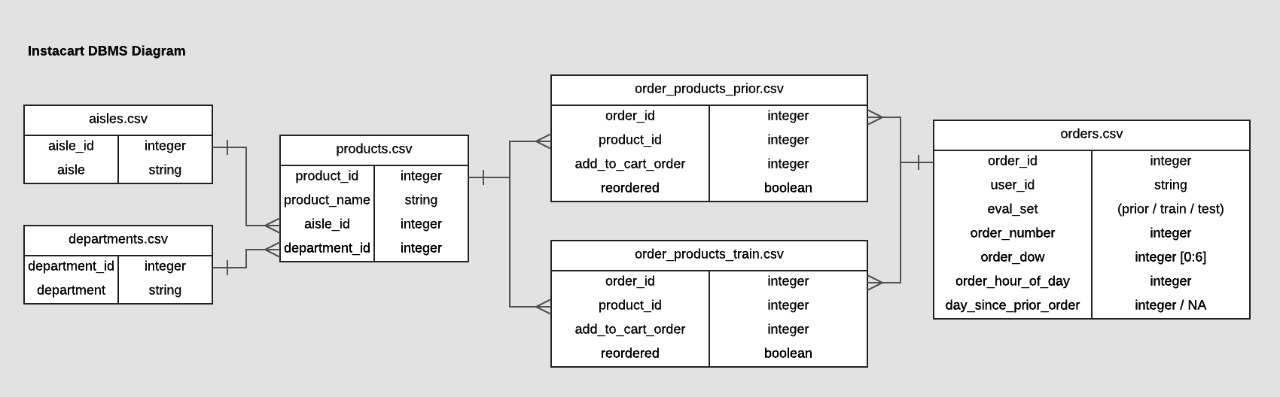

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p>We can pose this problem as a binary predication problem - given a user
, a product and his purchase history predict whether or not given product
will be reordered in the next order. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/instacart-market-basket-analysis/overview/evaluation

Metric(s): 
* Mean f1 score: https://en.wikipedia.org/wiki/F-score

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle competitions download -c instacart-market-basket-analysis

orders.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
departments.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
products.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
aisles.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
order_products__train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
order_products__prior.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip products.csv.zip -d '/content/'
!unzip orders.csv.zip -d '/content/'
!unzip order_products__train.csv.zip -d '/content/'
!unzip order_products__prior.csv.zip -d '/content/'
!unzip aisles.csv.zip -d '/content/'
!unzip departments.csv.zip -d '/content/'

Archive:  products.csv.zip
  inflating: /content/products.csv   
   creating: /content/__MACOSX/
  inflating: /content/__MACOSX/._products.csv  
Archive:  orders.csv.zip
  inflating: /content/orders.csv     
  inflating: /content/__MACOSX/._orders.csv  
Archive:  order_products__train.csv.zip
  inflating: /content/order_products__train.csv  
  inflating: /content/__MACOSX/._order_products__train.csv  
Archive:  order_products__prior.csv.zip
  inflating: /content/order_products__prior.csv  
  inflating: /content/__MACOSX/._order_products__prior.csv  
Archive:  aisles.csv.zip
  inflating: /content/aisles.csv     
  inflating: /content/__MACOSX/._aisles.csv  
Archive:  departments.csv.zip
  inflating: /content/departments.csv  
  inflating: /content/__MACOSX/._departments.csv  


<h1>3. Exploratory Data Analysis </h1>

In [1]:
#import of liberys
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

<h2> 3.1 Reading data and basic preprocessing </h2>

In [2]:
#reading all csv files.
%cd "/content"
data_path="/content/"
prior_data = pd.read_csv( data_path + 'order_products__prior.csv')
train_data = pd.read_csv( data_path + 'order_products__train.csv')
orders = pd.read_csv( data_path + 'orders.csv')
products=pd.read_csv( data_path + 'products.csv')
aisles=pd.read_csv( data_path + 'aisles.csv')
departments=pd.read_csv( data_path + 'departments.csv')

/content


<h3>3.1.1 Checking for NULL values</h3>

In [3]:
nan_rows = prior_data[prior_data.isnull().any(1)]
print (nan_rows)
nan_rows = train_data[train_data.isnull().any(1)]
print (nan_rows)
nan_rows = products[products.isnull().any(1)]
print (nan_rows)
nan_rows = aisles[aisles.isnull().any(1)]
print (nan_rows)
nan_rows = departments[departments.isnull().any(1)]
print (nan_rows)
nan_rows = orders[orders.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []
Empty DataFrame
Columns: [department_id, department]
Index: []
         order_id  user_id  ... order_hour_of_day  days_since_prior_order
0         2539329        1  ...                 8                     NaN
11        2168274        2  ...                11                     NaN
26        1374495        3  ...                14                     NaN
39        3343014        4  ...                11                     NaN
45        2717275        5  ...                12                     NaN
...           ...      ...  ...               ...                     ...
3420930    969311   206205  ...                12                     NaN
3420934   3189322   206206  .

In [4]:
nan_rows.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN


Observation-<br>
From the above observation orders.csv contain NAN values for the first order so we can replace this value with average day since prior order for that user.

In [5]:
#replace nan value in order.csv
avg_day_since_prior=orders[orders['days_since_prior_order'].apply(str)!='NaN']
avg_day_since_prior=(dict(avg_day_since_prior.groupby('user_id')['days_since_prior_order'].agg(np.mean).apply(int)))

for i in range(len(orders)):
  if str(orders['days_since_prior_order'][i])=='nan':
    orders['days_since_prior_order'].values[i]=avg_day_since_prior[orders['user_id'].values[i]]    
orders['days_since_prior_order'].apply(int)

0          19
1          15
2          21
3          29
4          28
           ..
3421078    29
3421079    30
3421080    18
3421081     7
3421082    30
Name: days_since_prior_order, Length: 3421083, dtype: int64

In [6]:
nan_rows = orders[orders.isnull().any(1)]
print (nan_rows)


Empty DataFrame
Columns: [order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


<h2>posing this problem as a binary classfication problem</h2>

In [ ]:
"""here we are pose this problem as binary classfication problem
    so,we are creating a data frame consist of
    1. user_id
    2. product_id(belongs to ordered products by the user_id in history)
    3. reordered(will the given product_id is reordered by the given user_id in next order)"""
train_users=pd.DataFrame(set(orders[orders['eval_set']=='train']['user_id']),columns=['user_id'])
train_user_record=pd.merge(orders,train_users,on='user_id',how='inner')
order_product_prior=train_user_record[train_user_record['eval_set']=='prior']
order_product_reorder=train_user_record[train_user_record['eval_set']=='train']
order_product_prior=pd.merge(order_product_prior,prior_data,on='order_id',how='inner')[['user_id','product_id']]
order_product_prior=order_product_prior.drop_duplicates(subset=['user_id', 'product_id'], keep='first')
order_product_reorder=pd.merge(order_product_reorder,train_data,on='order_id',how='inner')[['user_id','product_id','reordered']]                                                                 
final_df=pd.merge(order_product_prior,order_product_reorder,on=['user_id','product_id'],how='left')
for i in range(len(final_df)):
  if str(final_df['reordered'][i])=='nan':
    final_df['reordered'].values[i]=0
print("percentage of reorders items in next orders ",np.round(np.sum(final_df['reordered'])/len(final_df)*100))

percentage of reorders items in next orders  10.0


<h2>3.2 Basic stats on data</h2>

In [ ]:
print("1.We are having orders details for ",len(set(orders['user_id'])),"no of users")
print("2.No of unique orders in prior data is ",len(set(prior_data['order_id'])))
print("2.No of unique orders in train data is ",len(set(train_data['order_id'])))
print("3.No of unique product in prior data is ",len(set(prior_data['product_id'])))
print("4.No of unique products in train data is ",len(set(train_data['product_id'])))
print("5.Finallly we having ",len(set(list(set(prior_data['order_id']))+list(set(train_data["order_id"])))),"unique orders for ",len(set(list(set(prior_data['product_id']))+list(set(train_data['product_id'])))),"no of products for ",len(set(orders['user_id'])),"no of users")
reorder_percent=len(prior_data[prior_data["reordered"]==1])/len(prior_data)*100
print("6.",np.round(reorder_percent),"of the orders contain reorders")

1.We are having orders details for  206209 no of users
2.No of unique orders in prior data is  3214874
2.No of unique orders in train data is  131209
3.No of unique product in prior data is  49677
4.No of unique products in train data is  39123
5.Finallly we having  3346083 unique orders for  49685 no of products for  206209 no of users
6. 59.0 of the orders contain reorders


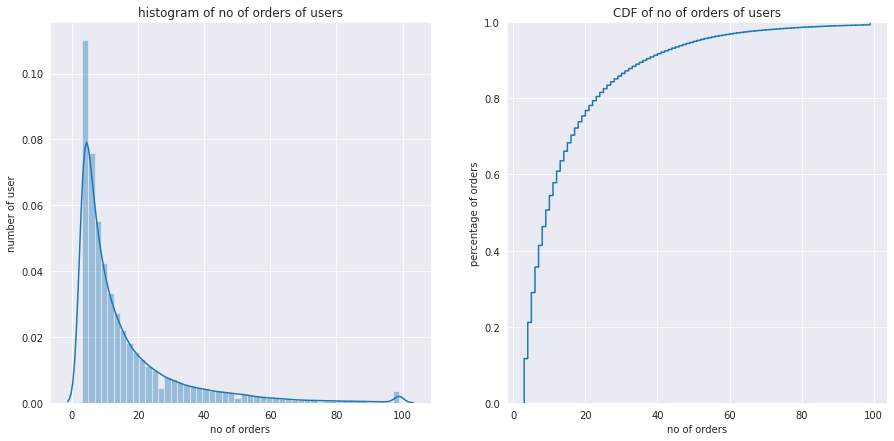

In [46]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)#for ploting of no of orders
sns.set_style('darkgrid')
nb_orders=orders[orders['eval_set']=='prior']
nb_orders=((nb_orders.groupby(['user_id']))['order_id'].count())
sns.distplot(nb_orders)
plt.xlabel("no of orders")
plt.ylabel('number of user')
plt.title("histogram of no of orders of users")

plt.subplot(1, 2, 2)#for ploting of order size
sns.set_style('darkgrid')
sns.ecdfplot(nb_orders.values)
plt.xlabel("no of orders")
plt.ylabel('percentage of orders')
plt.title("CDF of no of orders of users")

plt.show()

Observations:-<br>
    </t>1.    From the abobe plots, we can say that in the prior dataset, maximum no of users place 5 (i.e(40%)) orders and around 80% of user order less then 20 order and 3% of user order more than 60 orders  .

***Q.what is the no of orders per user and and order size. ***

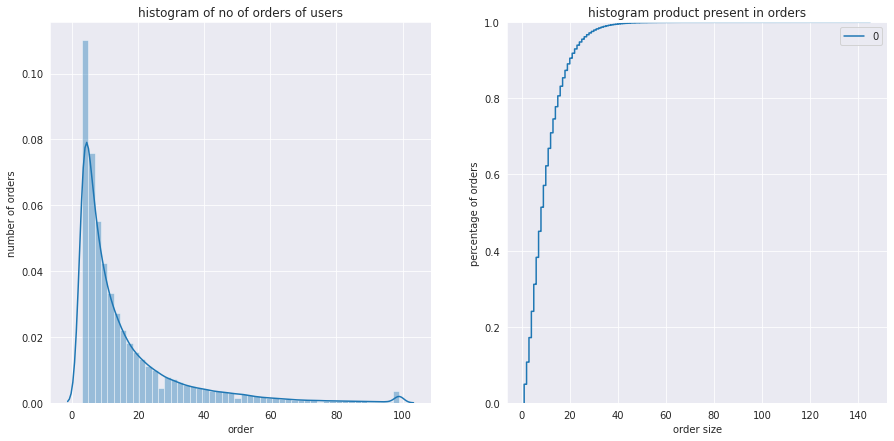

In [45]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)#for ploting of no of orders
sns.set_style('darkgrid')
order_size=pd.merge(prior_data,orders, how='inner', on='order_id')
order_size=dict(order_size.groupby(['user_id','order_id'])['order_id'].count())
sns.distplot(nb_orders)
plt.xlabel("order")

plt.ylabel('number of orders')
plt.title("histogram of no of orders of users")


plt.subplot(1, 2, 2)#for ploting of order size
sns.set_style('darkgrid')

sns.ecdfplot(order_size.values())
plt.xlabel("order size")
plt.ylabel('percentage of orders')
plt.title("histogram product present in orders")

plt.show()

Observations:-<br>
    </t>1.    From the abobe plots, we can say that in the prior dataset, maximum no of orders contain 5-6 products and 80% of the order has contain less 15 items

<h2>3.3 product related analysis</h2>

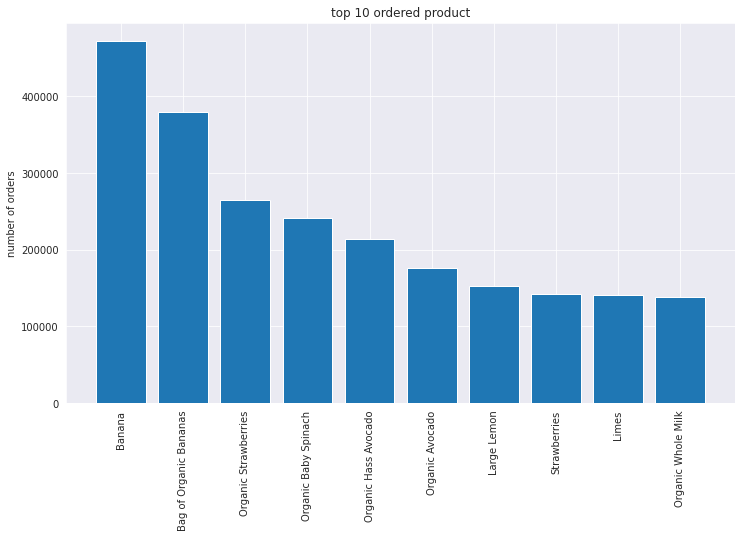

In [ ]:
ordered_product=pd.merge(prior_data,products,on='product_id',how='inner')
ordered_product=(Counter(ordered_product['product_name']))
ordered_product=dict(sorted(ordered_product.items(), key=lambda ordered_product: ordered_product[1],reverse=True))
fig= plt.figure(figsize=(12,7))
plt.bar(list(ordered_product.keys())[:10],list(ordered_product.values())[:10])
plt.xticks([item for item in list(ordered_product.keys())[:10]],rotation='vertical')
plt.ylabel('number of orders')
plt.title("top 10 ordered product")
plt.show()

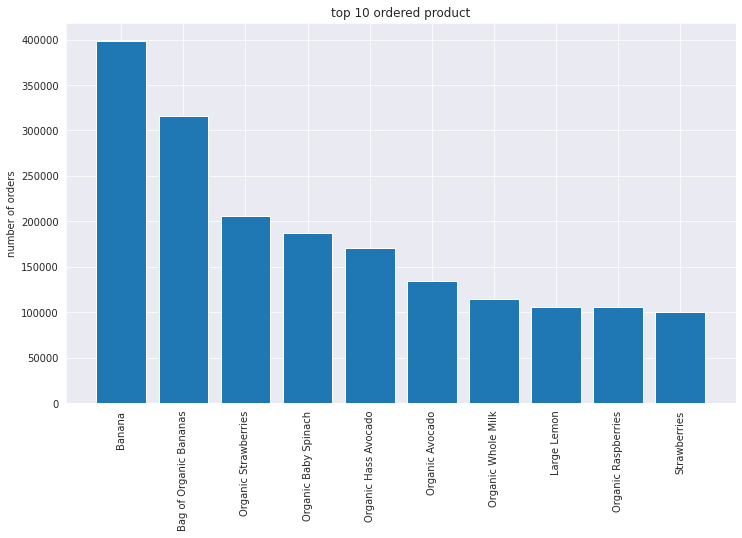

In [ ]:
reordered_product=prior_data[prior_data['reordered']==1]
reordered_product=pd.merge(reordered_product,products,on='product_id',how='inner')
reordered_product=(Counter(reordered_product['product_name']))
reordered_product=dict(sorted(reordered_product.items(), key=lambda reordered_product: reordered_product[1],reverse=True))
fig= plt.figure(figsize=(12,7))
plt.bar(list(reordered_product.keys())[:10],list(reordered_product.values())[:10])
plt.xticks([item for item in list(reordered_product.keys())[:10]],rotation='vertical')
plt.ylabel('number of orders')
plt.title("top 10 ordered product")
plt.show()

observations:-<br>
1. From the above two plots, it can be observed that the products having higher frequency in the first plot have been ordered more number of times according to the second plot.
2. *Thus, the most ordered products have the higer chance of getting reordered.*

**Q. Top five important departments and aisles (importance based on no of orders)**

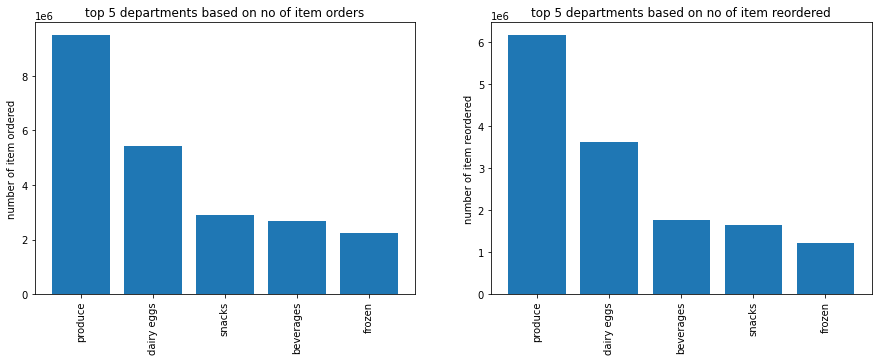

In [ ]:
dept=pd.merge(prior_data,products,on='product_id',how='inner')
dept=pd.merge(dept,departments,on='department_id',how='inner')
re_dept=dept[dept['reordered']==1]
re_dept=(Counter(re_dept['department']))
dept=(Counter(dept['department']))
dept=dict(sorted(dept.items(), key=lambda dept: dept[1],reverse=True))
re_dept=dict(sorted(re_dept.items(), key=lambda re_dept: re_dept[1],reverse=True))
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(list(dept.keys())[:5],list(dept.values())[:5])
plt.xticks([dept for dept in list(dept.keys())[:5]],rotation='vertical')
plt.ylabel('number of item ordered')
plt.title("top 5 departments based on no of item orders")

plt.subplot(1,2,2)
plt.bar(list(re_dept.keys())[:5],list(re_dept.values())[:5])
plt.xticks([dept for dept in list(re_dept.keys())[:5]],rotation='vertical')
plt.ylabel('number of item reordered')
plt.title("top 5 departments based on no of item reordered")

plt.show()

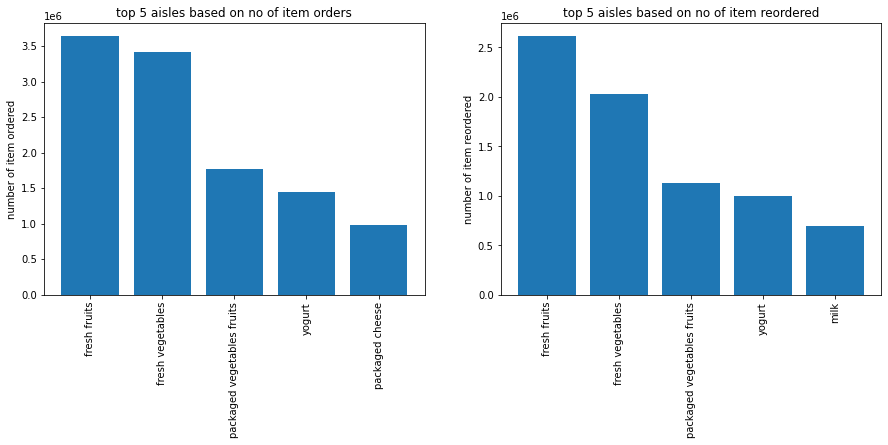

In [ ]:


dept=pd.merge(prior_data,products,on='product_id',how='inner')
dept=pd.merge(dept,aisles,on='aisle_id',how='inner')
re_dept=dept[dept['reordered']==1]
re_dept=(Counter(re_dept['aisle']))
dept=(Counter(dept['aisle']))
dept=dict(sorted(dept.items(), key=lambda dept: dept[1],reverse=True))
re_dept=dict(sorted(re_dept.items(), key=lambda re_dept: re_dept[1],reverse=True))
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(list(dept.keys())[:5],list(dept.values())[:5])
plt.xticks([dept for dept in list(dept.keys())[:5]],rotation='vertical')
plt.ylabel('number of item ordered')
plt.title("top 5 aisles based on no of item orders")

plt.subplot(1,2,2)
plt.bar(list(re_dept.keys())[:5],list(re_dept.values())[:5])
plt.xticks([dept for dept in list(re_dept.keys())[:5]],rotation='vertical')
plt.ylabel('number of item reordered')
plt.title("top 5 aisles based on no of item reordered")

plt.show()

observations:-<br>
1. From the above plots, we can say that product are reorder more from the department and aisle which having high no of orders.


<h2>3.3 User  releated analysis:-<br></h2>


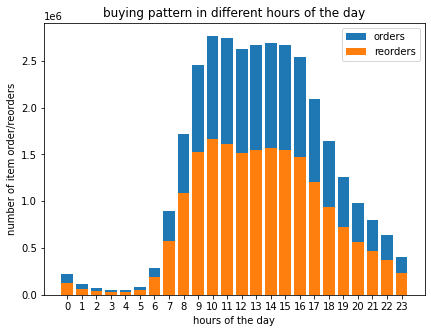

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
nb_order=pd.merge(prior_data,orders,on='order_id',how='inner')
nb_reorder=nb_order[nb_order['reordered']==1]
nb_order=Counter(nb_order['order_hour_of_day'])
nb_reorder=Counter(nb_reorder['order_hour_of_day'])
plt.subplot(1,2,1)
plt.bar(list(nb_order.keys()),list(nb_order.values()),label="orders")
plt.bar(list(nb_reorder.keys()),list(nb_reorder.values()),label="reorders")
plt.legend(loc='best')
plt.xticks(list(set(nb_order.keys())))
plt.xlabel("hours of the day")
plt.ylabel('number of item order/reorders')
plt.title("buying pattern in different hours of the day")
plt.show()

In [27]:
prod=[]
for i in range(8,20):
  temp=orders[(orders['eval_set']=='prior') & (orders['order_hour_of_day']==i)]
  temp=pd.merge(prior_data,temp,on='order_id',how='inner')
  temp=pd.merge(temp,products,on='product_id',how='inner')
  temp=temp[temp['reordered']==1]
  reordered_product=dict(Counter(temp['product_name']))
  reordered_product=dict(sorted(reordered_product.items(), key=lambda reordered_product: reordered_product[1],reverse=True))
  prod.append(list(reordered_product.keys())[0:3])

In [28]:
dept=[]
for i in range(8,20):
  temp=orders[(orders['eval_set']=='prior') & (orders['order_hour_of_day']==i)]
  temp=pd.merge(prior_data,temp,on='order_id',how='inner')
  temp=pd.merge(temp,products,on='product_id',how='inner')
  temp=pd.merge(departments,temp,on='department_id',how='inner')
  temp=temp[temp['reordered']==1]
  reordered_dept=dict(Counter(temp['department']))
  reordered_dept=dict(sorted(reordered_dept.items(), key=lambda reordered_dept: reordered_dept[1],reverse=True))
  dept.append(list(reordered_dept.keys())[0:3])

In [29]:
ais=[]
for i in range(8,20):
  temp=orders[(orders['eval_set']=='prior') & (orders['order_hour_of_day']==i)]
  temp=pd.merge(prior_data,temp,on='order_id',how='inner')
  temp=pd.merge(temp,products,on='product_id',how='inner')
  temp=pd.merge(aisles,temp,on='aisle_id',how='inner')
  temp=temp[temp['reordered']==1]
  reordered_aisle=dict(Counter(temp['aisle']))
  reordered_aisle=dict(sorted(reordered_aisle.items(), key=lambda reordered_aisle: reordered_aisle[1],reverse=True))
  ais.append(list(reordered_aisle.keys())[0:3])

Observations:-<br>
1.From the above plot most of the user place order in between  8AM to 7PM

Q.Let see what is the top products, department and aisle based on reorder rate between 8AM to 7PM

In [31]:
imp_prod=pd.DataFrame()
imp_prod['houre of day']=np.arange(8,20,1)
imp_prod['product having high no of reorder']=prod
imp_prod['depatment having high no of reorder']=dept
imp_prod['aisle having high no of reorder']=ais
imp_prod

,houre of day,product having high no of reorder,depatment having high no of reorder,aisle having high no of reorder
0,8,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."
1,9,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, yogurt]"
2,10,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."
3,11,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."
4,12,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."
5,13,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."
6,14,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."
7,15,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."
8,16,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."
9,17,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."


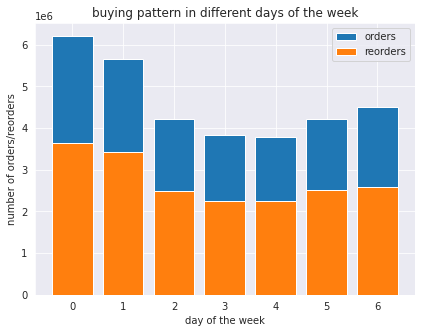

In [32]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
nb_order=pd.merge(prior_data,orders,on='order_id',how='inner')
nb_reorder=nb_order[nb_order['reordered']==1]
nb_order=Counter(nb_order['order_dow'])
nb_reorder=Counter(nb_reorder['order_dow'])
plt.subplot(1,2,1)
plt.bar(list(nb_order.keys()),list(nb_order.values()),label="orders")
plt.bar(list(nb_reorder.keys()),list(nb_reorder.values()),label="reorders")
plt.legend(loc='best')
plt.xticks(list(set(nb_order.keys())))
plt.xlabel("day of the week")
plt.ylabel('number of orders/reorders')
plt.title("buying pattern in different days of the week")
plt.show()

Observations:-<br>
1.From the above plot we can say maximum of the order placed in weekends as compared to weekdays

Q.Let see what is the top products, department and aisle based on reorder rate on weekends

In [36]:
prod=[]
for i in range(2):
  temp=orders[(orders['eval_set']=='prior') & (orders['order_dow']==i)]
  temp=pd.merge(prior_data,temp,on='order_id',how='inner')
  temp=pd.merge(temp,products,on='product_id',how='inner')
  temp=temp[temp['reordered']==1]
  reordered_product=dict(Counter(temp['product_name']))
  reordered_product=dict(sorted(reordered_product.items(), key=lambda reordered_product: reordered_product[1],reverse=True))
  prod.append(list(reordered_product.keys())[0:3])
  
dept=[]
for i in range(2):
  temp=orders[(orders['eval_set']=='prior') & (orders['order_dow']==i)]
  temp=pd.merge(prior_data,temp,on='order_id',how='inner')
  temp=pd.merge(temp,products,on='product_id',how='inner')
  temp=pd.merge(departments,temp,on='department_id',how='inner')
  temp=temp[temp['reordered']==1]
  reordered_dept=dict(Counter(temp['department']))
  reordered_dept=dict(sorted(reordered_dept.items(), key=lambda reordered_dept: reordered_dept[1],reverse=True))
  dept.append(list(reordered_dept.keys())[0:3])
  
ais=[]
for i in range(2):
  temp=orders[(orders['eval_set']=='prior') & (orders['order_dow']==i)]
  temp=pd.merge(prior_data,temp,on='order_id',how='inner')
  temp=pd.merge(temp,products,on='product_id',how='inner')
  temp=pd.merge(aisles,temp,on='aisle_id',how='inner')
  temp=temp[temp['reordered']==1]
  reordered_aisle=dict(Counter(temp['aisle']))
  reordered_aisle=dict(sorted(reordered_aisle.items(), key=lambda reordered_aisle: reordered_aisle[1],reverse=True))
  ais.append(list(reordered_aisle.keys())[0:3])
  
imp_prod=pd.DataFrame()
imp_prod['order_dow']=np.arange(2)
imp_prod['product having high reorder ']=prod
imp_prod['depatment having high reorder']=dept
imp_prod['aisle having high reorder']=ais
imp_prod

,order_dow,product having high reorder,depatment having high reorder,aisle having high reorder
0,0,"[Banana, Bag of Organic Bananas, Organic Baby ...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."
1,1,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."


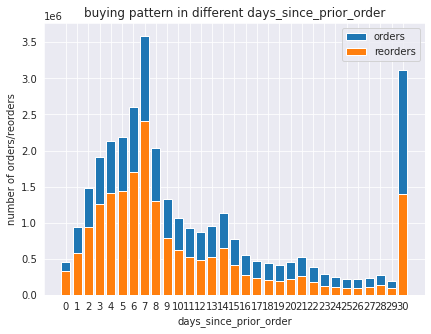

In [37]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
nb_order=pd.merge(prior_data,orders,on='order_id',how='inner')
nb_reorder=nb_order[nb_order['reordered']==1]
nb_order=Counter(nb_order['days_since_prior_order'])
nb_reorder=Counter(nb_reorder['days_since_prior_order'])
plt.subplot(1,2,1)
plt.bar(list(nb_order.keys()),list(nb_order.values()),label="orders")
plt.bar(list(nb_reorder.keys()),list(nb_reorder.values()),label="reorders")
plt.legend(loc='best')
plt.xticks(list(set(nb_order.keys())))
plt.xlabel("days_since_prior_order")
plt.ylabel('number of orders/reorders')
plt.title("buying pattern in different days_since_prior_order")
plt.show()

Observations:-<br>
1.From the above plot most the user place their next order in within a week or after a month.

Q.Let see what is the top products, department and aisle based on reorder rate on weekends and on 30th day

In [38]:
prod=[]
t=[6,7,30]
for i in t:
  temp=orders[(orders['eval_set']=='prior') & (orders['days_since_prior_order']==i)]
  temp=pd.merge(prior_data,temp,on='order_id',how='inner')
  temp=pd.merge(temp,products,on='product_id',how='inner')
  temp=temp[temp['reordered']==1]
  reordered_product=dict(Counter(temp['product_name']))
  reordered_product=dict(sorted(reordered_product.items(), key=lambda reordered_product: reordered_product[1],reverse=True))
  prod.append(list(reordered_product.keys())[0:3])
  
dept=[]
for i in t:
  temp=orders[(orders['eval_set']=='prior') & (orders['days_since_prior_order']==i)]
  temp=pd.merge(prior_data,temp,on='order_id',how='inner')
  temp=pd.merge(temp,products,on='product_id',how='inner')
  temp=pd.merge(departments,temp,on='department_id',how='inner')
  temp=temp[temp['reordered']==1]
  reordered_dept=dict(Counter(temp['department']))
  reordered_dept=dict(sorted(reordered_dept.items(), key=lambda reordered_dept: reordered_dept[1],reverse=True))
  dept.append(list(reordered_dept.keys())[0:3])
  
ais=[]
for i in t:
  temp=orders[(orders['eval_set']=='prior') & (orders['days_since_prior_order']==i)]
  temp=pd.merge(prior_data,temp,on='order_id',how='inner')
  temp=pd.merge(temp,products,on='product_id',how='inner')
  temp=pd.merge(aisles,temp,on='aisle_id',how='inner')
  temp=temp[temp['reordered']==1]
  reordered_aisle=dict(Counter(temp['aisle']))
  reordered_aisle=dict(sorted(reordered_aisle.items(), key=lambda reordered_aisle: reordered_aisle[1],reverse=True))
  ais.append(list(reordered_aisle.keys())[0:3])
  
imp_prod=pd.DataFrame()
imp_prod['houre of day']=t
imp_prod['product having high reorder']=prod
imp_prod['depatment having high reorder']=dept
imp_prod['aisle having high reorder']=ais
imp_prod

,houre of day,product having high reorder,depatment having high reorder,aisle having high reorder
0,6,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."
1,7,"[Banana, Bag of Organic Bananas, Organic Straw...","[produce, dairy eggs, snacks]","[fresh fruits, fresh vegetables, packaged vege..."
2,30,"[Banana, Bag of Organic Bananas, Organic Baby ...","[produce, dairy eggs, beverages]","[fresh fruits, fresh vegetables, packaged vege..."


Observations:-<br>
From the above analysis top 3(1.e based on reorder)


>


1.  Products are Banana, Bag of Organic Bananas, Organic Strawberries.
2.  Departments are produce, dairy eggs, beverages
3.  Aisles are fresh fruits, fresh vegetables, packaged vegetables furits<br>

so we can say that peoples are often reorder fruits,egg,vegetables etc...

<h3>EDA after feature engg:-</h3>

In [ ]:
def get_data(flag='train'):
  '''this function will get the current features releted to next order and all history features of that user if the user belongs to train data then get the output variable i.e reordered'''
  preprocessed_data=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Untitled folder/data/preprocessed.csv')
  orders = pd.read_csv('/content/orders.csv')
  temp=orders[orders['eval_set']==flag][['order_id','user_id','order_dow','order_hour_of_day','days_since_prior_order']]  
  preprocessed_data=pd.merge(preprocessed_data,temp,on='user_id',how='inner')
  if flag=='train':
    train_data = pd.read_csv('order_products__train.csv')
    temp2=pd.merge(orders,train_data,on='order_id',how='inner')[['user_id','product_id','reordered']]
    preprocessed_data=pd.merge(preprocessed_data,temp2,on=['user_id','product_id'],how='left')
    for i in range(len(preprocessed_data)):
      if str(preprocessed_data['reordered'][i])=='nan':
        preprocessed_data['reordered'].values[i]=0
  preprocessed_data=preprocessed_data.drop(['order_id'], axis=1)
  return preprocessed_data

In [ ]:
train_data=get_data(flag='train')

In [ ]:
train_data.head(2)

,user_id,product_id,nb_times_userA_order_itemB,avg_pos_cart_userA_itemB,nb_order_userA_itemB_last5,median_day_since_prior_order_userA_itemB,streak_userA_itemB,mean_order_diff_userA_itemB,nb_order_userA_not_ordered_itemB,difference_mean_order_diff_nb_order_not_ordered_userA_itemB,order_ratio_userA_itemB,no_order_aisle_userA_itemB,avg_add_to_cart_order_aisle_userA_itemB,no_order_department_userA_itemB,avg_add_to_cart_order_department_userA_itemB,no_of_order_by_user,avg_order_size_of_user,no_of_item_ordered_user,no_of_item_reordered_user,avg_overall_reorder_rate_user,avg_day_between_orders_of_user,median_hour_of_day_user_visit,median_order_dow_user,avg_reordered_rate_per_order_user,no_of_times_ordered_itemA,no_of_times_reordered_itemA,no_of_user_ordered_itemA,avg_cart_pos_itemA,avg_order_dow_itemA,avg_order_hour_of_day_itemA,avg_days_since_prior_order_itemA,no_of_user_order_aisle_itemA,nb_order_aisle_itemA,nb_reorder_aisle_itemA,mean_add_to_cart_order_of_aisle_itemA,no_of_user_order_department_itemA,nb_order_department_itemA,nb_reorder_department_itemA,mean_add_to_cart_order_of_department_itemA,order_dow,order_hour_of_day,days_since_prior_order,reordered
0,1,196,10,1.4,5,19.5,10,1.0,0,1.0,1.0,13,1.769231,13,1.769231,10.0,5.9,59.0,41.0,0.694915,19.5,8.5,2.5,0.705833,35791,27791,8000,2,3,12,9,63506.0,357537.0,228406.0,6.453676,14068.0,2690129.0,1757892.0,6.976699,4,8,14.0,1.0
1,1,46149,3,3.0,3,14.0,3,1.0,0,1.0,0.3,13,1.769231,13,1.769231,10.0,5.9,59.0,41.0,0.694915,19.5,8.5,2.5,0.705833,8558,6953,1605,2,3,12,9,63506.0,357537.0,228406.0,6.453676,14068.0,2690129.0,1757892.0,6.976699,4,8,14.0,1.0


Here i performed Univarint analysis with respect to output valiable on the newly created features:-

---






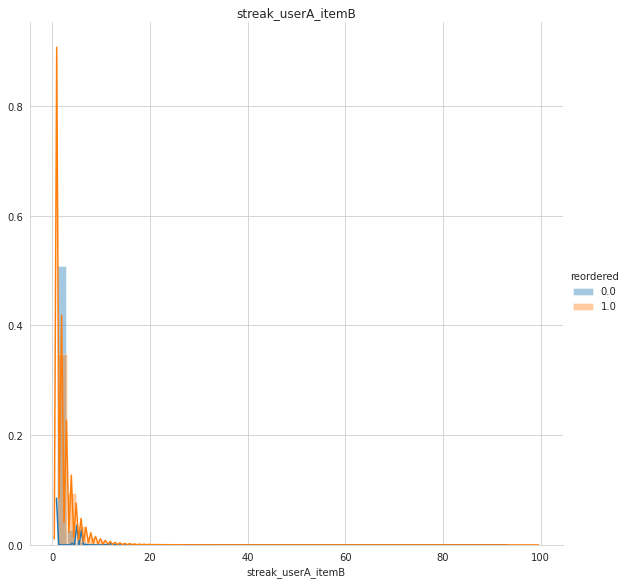

In [ ]:
sns.FacetGrid(train_data, hue="reordered", size=8).map(sns.distplot, 'streak_userA_itemB').add_legend()
plt.title('streak_userA_itemB')
plt.show()

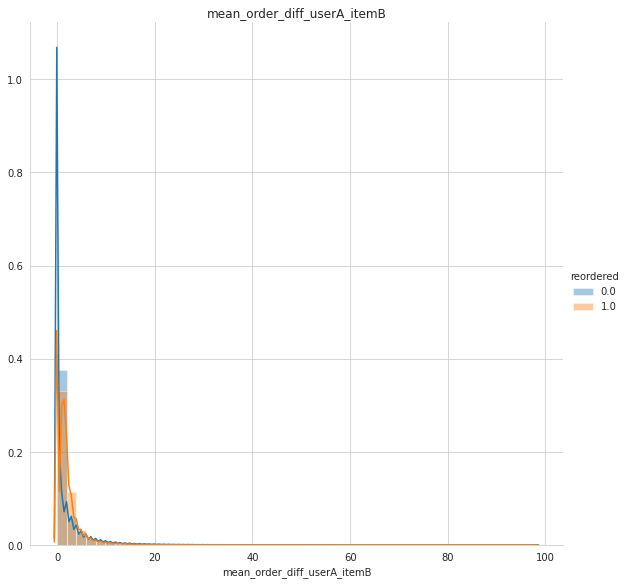

In [ ]:
sns.FacetGrid(train_data, hue="reordered", size=8).map(sns.distplot, 'mean_order_diff_userA_itemB').add_legend()
plt.title('mean_order_diff_userA_itemB')
plt.show()

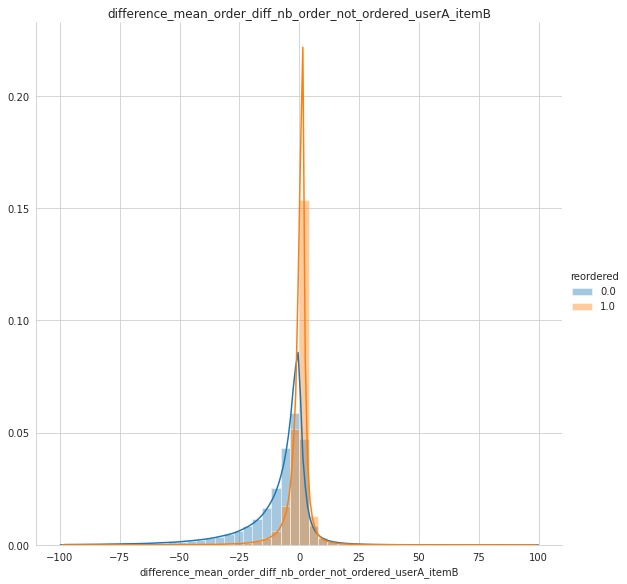

In [ ]:
sns.FacetGrid(train_data, hue="reordered", size=8).map(sns.distplot, 'difference_mean_order_diff_nb_order_not_ordered_userA_itemB').add_legend()
plt.title('difference_mean_order_diff_nb_order_not_ordered_userA_itemB')
plt.show()

Observation:-<br>
From the above graph we can say that these features preserve some informtion as there distribution does not overlap perfectly

<h3>Bivariant analysis:-</h3><br>
Here i have taken a sub set of crated features and done bivariant analysis on them then i have shown some usefull graph below

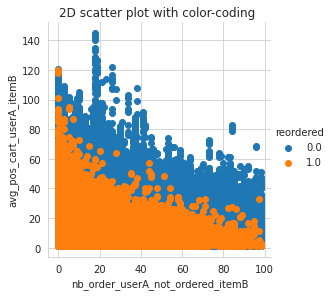

In [ ]:
sns.FacetGrid(train_data, hue="reordered", size=4).map(plt.scatter, 'nb_order_userA_not_ordered_itemB', 'avg_pos_cart_userA_itemB').add_legend();
plt.title("2D scatter plot with color-coding ")
plt.show();

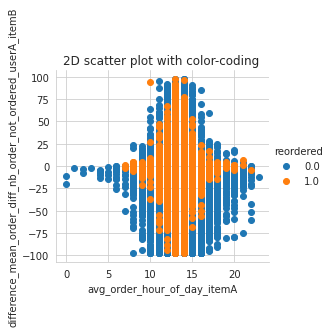

In [ ]:
sns.FacetGrid(train_data, hue="reordered", size=4).map(plt.scatter, 'avg_order_hour_of_day_itemA', 'difference_mean_order_diff_nb_order_not_ordered_userA_itemB').add_legend();
plt.title("2D scatter plot with color-coding ")
plt.show();

Observation:-<br>
we are not getting any usefull information from bivariant  analysis but from the above graph we can see that the two classes are partially classfied means these features preserving some information.

<h2>Conclusion:-</h2>
1.The most ordered products have the higer chance of getting reordered.<br>
2.Most of the users order products during the day hours and maximum orders get placed in weekends.<br>
3.we are heaving 10% of the loyal user(i.e made more then 40 orders and 3% of this users are ordered more then 60 times)<br> 
3.Users often place order after a month or a week.<br>
4.Peoples are often reorder fruits,egg,vegetables etc...<br>
5.From the analysis we can say that these newly created features preserves some information to classfiy these two classes.